In [ ]:
#cleaning the data and Visualising 

In [31]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pa.read_csv('commodity_prices.csv')

In [5]:
data

,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1,1960-01-01,1.63,1.63,0.940900,0.696864,0.930301,1.121401,1.037400,0.122356,0.116845,0.066600
1,2,1960-02-01,1.63,1.63,0.946900,0.688707,0.930301,1.121401,1.037400,0.122356,0.119049,0.067900
2,3,1960-03-01,1.63,1.63,0.928100,0.688707,0.930301,1.121401,1.037400,0.122356,0.121254,0.068300
3,4,1960-04-01,1.63,1.63,0.930300,0.684519,0.930301,1.121401,1.037400,0.122356,0.123459,0.068100
4,5,1960-05-01,1.63,1.63,0.920000,0.690692,0.930301,1.121401,1.037400,0.122356,0.121254,0.068300
...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,2022-08-01,98.60,97.75,5.917861,2.417366,4.210000,3.538154,2.360000,0.330773,0.782199,0.393525
752,753,2022-09-01,90.16,90.63,5.897138,2.455065,4.490000,3.153198,2.360000,0.323621,0.770956,0.390659
753,754,2022-10-01,93.13,90.59,5.292852,2.270979,4.135621,2.833112,2.457500,0.320943,0.762578,0.386911
754,755,2022-11-01,91.07,86.28,4.715462,2.041258,3.831528,2.849979,2.490000,0.332993,0.792340,0.407414


In [6]:
data.columns

Index(['Unnamed: 0', 'date', 'oil_brent', 'oil_dubai', 'coffee_arabica',
       'coffee_robustas', 'tea_columbo', 'tea_kolkata', 'tea_mombasa',
       'sugar_eu', 'sugar_us', 'sugar_world'],
      dtype='object')

In [7]:
#one additional unwanted column is there, so we romoving it by
data = data.drop(columns = ['Unnamed: 0'])

In [8]:
data.info() #to check the Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             756 non-null    object 
 1   oil_brent        756 non-null    float64
 2   oil_dubai        756 non-null    float64
 3   coffee_arabica   756 non-null    float64
 4   coffee_robustas  756 non-null    float64
 5   tea_columbo      756 non-null    float64
 6   tea_kolkata      756 non-null    float64
 7   tea_mombasa      756 non-null    float64
 8   sugar_eu         756 non-null    float64
 9   sugar_us         756 non-null    float64
 10  sugar_world      756 non-null    float64
dtypes: float64(10), object(1)
memory usage: 65.1+ KB


In [9]:
data['date']= pa.to_datetime(data['date'])

In [10]:
data.isnull().sum()

date               0
oil_brent          0
oil_dubai          0
coffee_arabica     0
coffee_robustas    0
tea_columbo        0
tea_kolkata        0
tea_mombasa        0
sugar_eu           0
sugar_us           0
sugar_world        0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             756 non-null    datetime64[ns]
 1   oil_brent        756 non-null    float64       
 2   oil_dubai        756 non-null    float64       
 3   coffee_arabica   756 non-null    float64       
 4   coffee_robustas  756 non-null    float64       
 5   tea_columbo      756 non-null    float64       
 6   tea_kolkata      756 non-null    float64       
 7   tea_mombasa      756 non-null    float64       
 8   sugar_eu         756 non-null    float64       
 9   sugar_us         756 non-null    float64       
 10  sugar_world      756 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 65.1 KB


In [12]:
data.duplicated().sum()

0

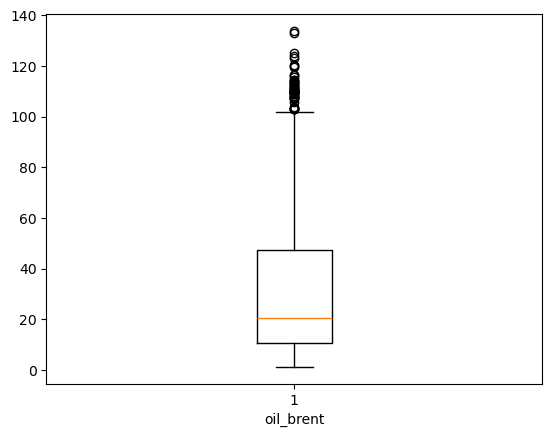

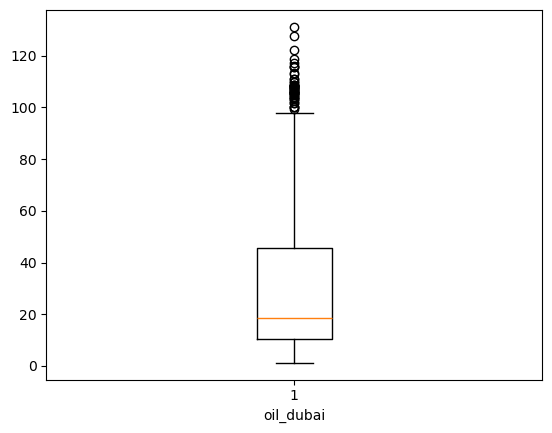

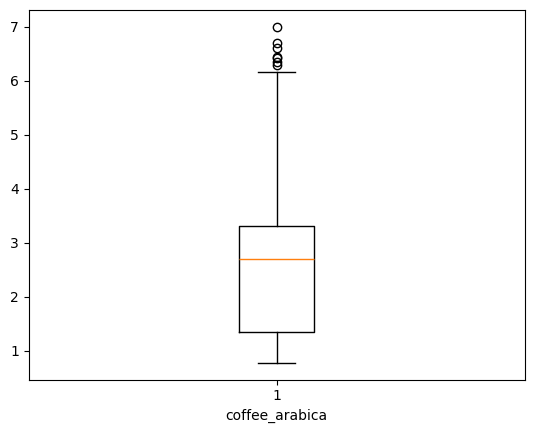

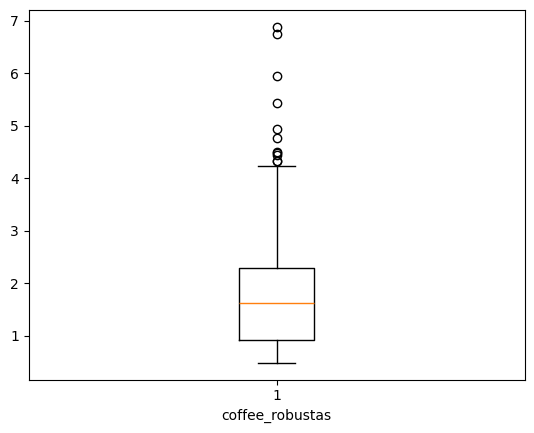

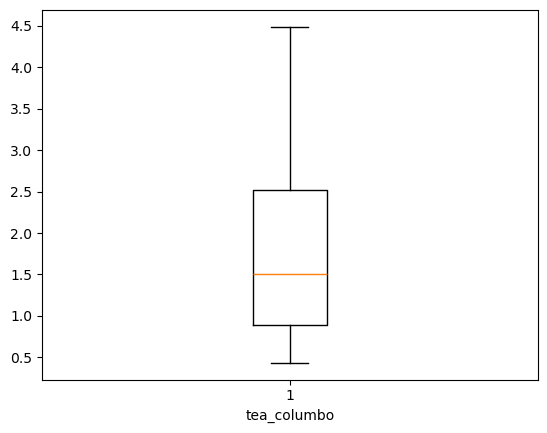

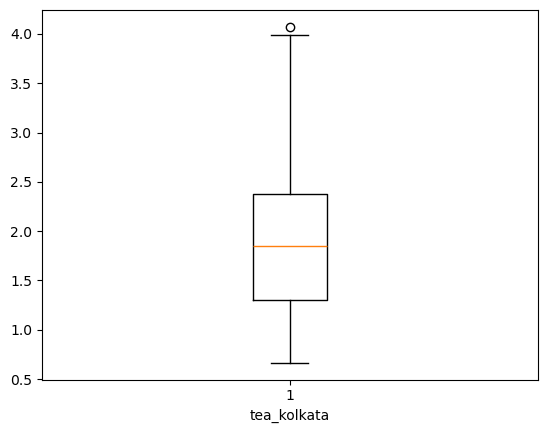

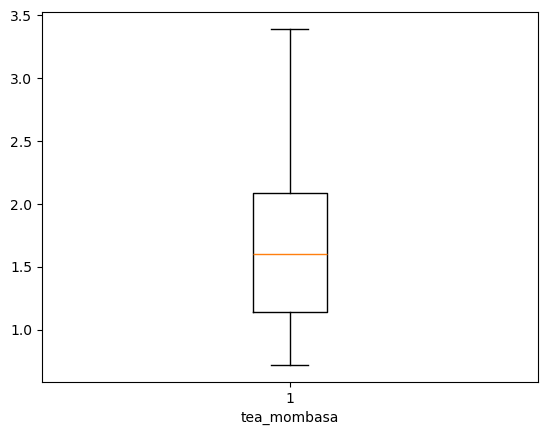

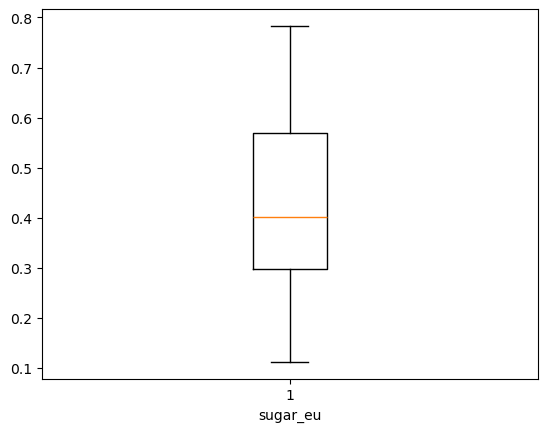

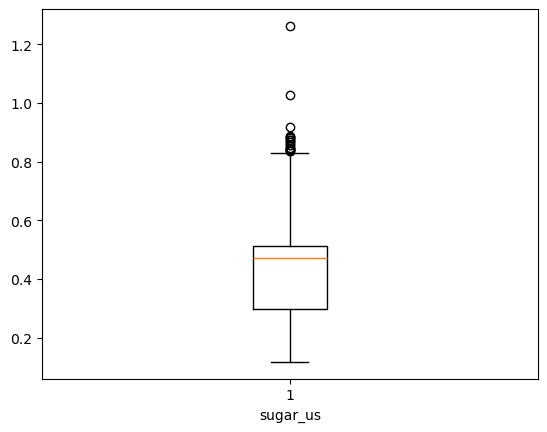

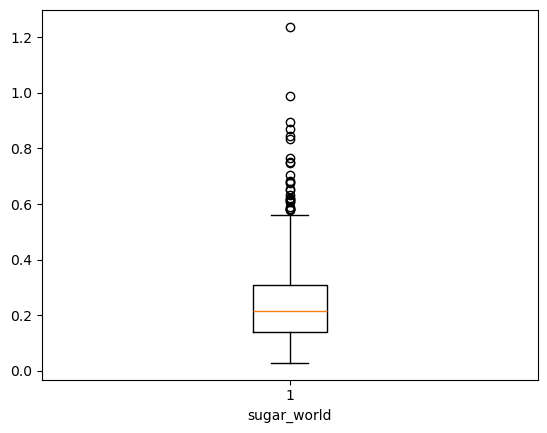

In [13]:
#checking Outliers for the whole data using Loops:
for i in data.columns:
    if data[i].dtypes =='int64' or  data[i].dtypes =='float64':
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.show()

In [14]:
#removing the outliers



        

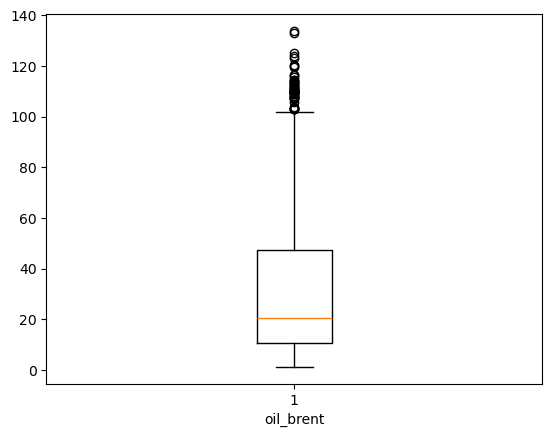

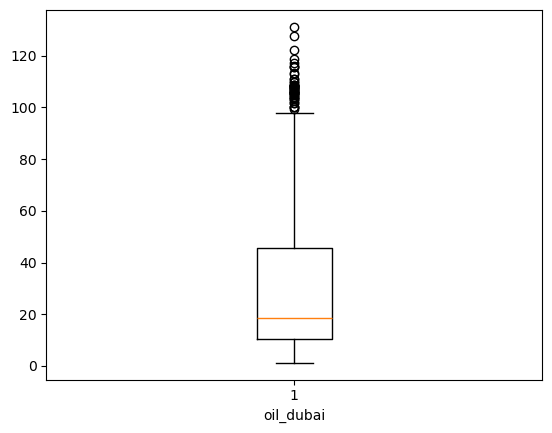

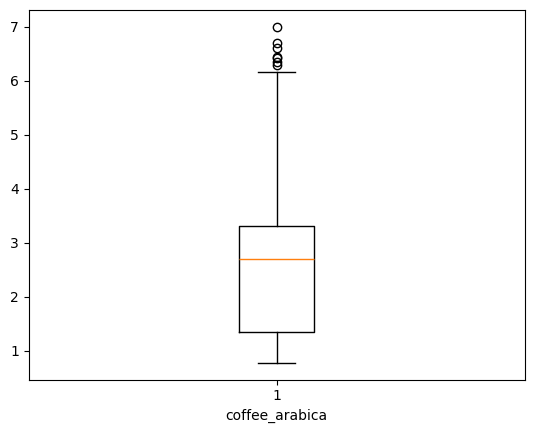

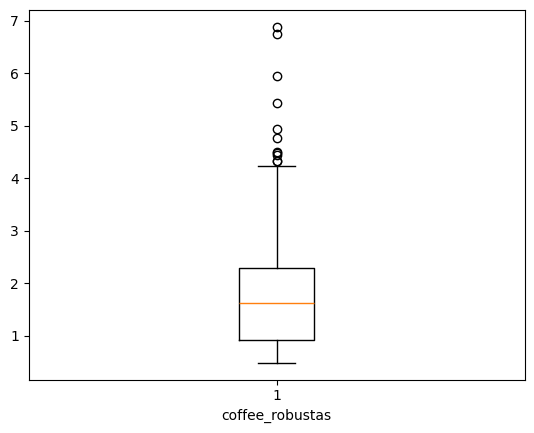

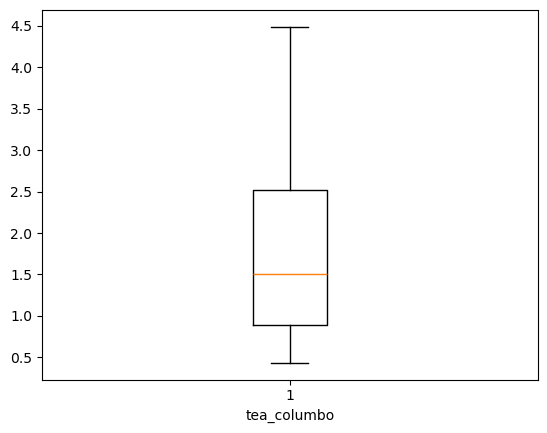

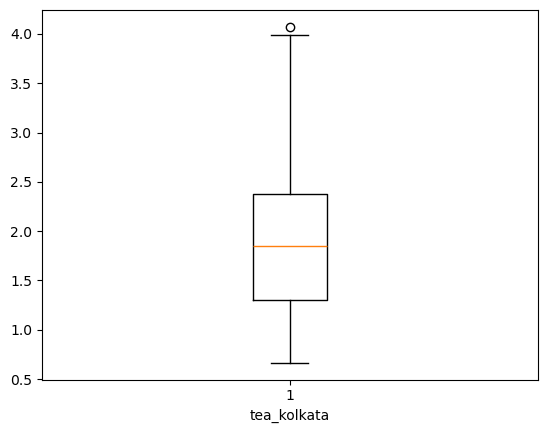

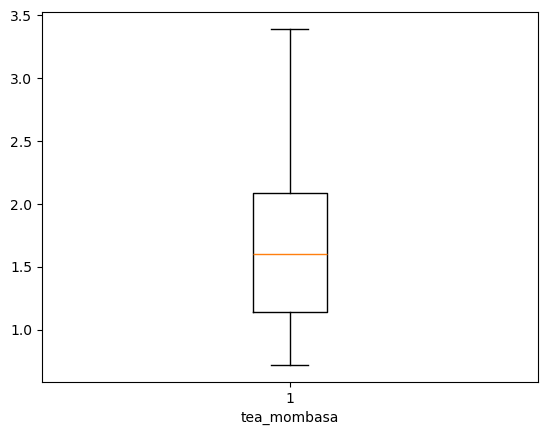

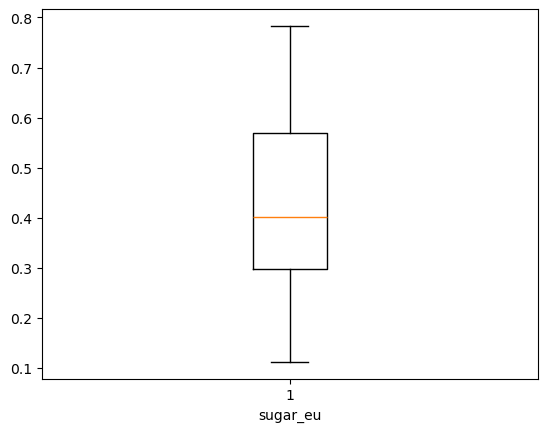

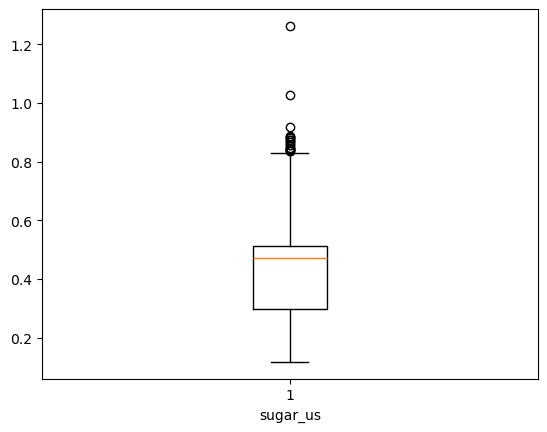

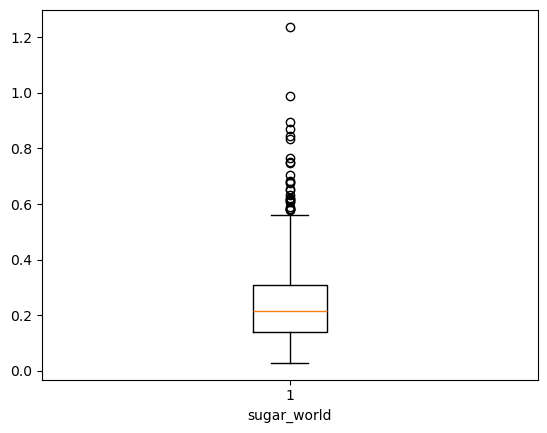

In [15]:
for i in data.columns:
    if data[i].dtypes =='int64' or  data[i].dtypes =='float64':
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.show()

In [16]:
data_filtered = data[(data['date'].dt.year >= 1960) & (data['date'].dt.year <= 2022)]

maximum = data_filtered['coffee_robustas'].max()
minimum = data_filtered['coffee_robustas'].min()

max_date = data_filtered[data_filtered['coffee_robustas'] == maximum]['date'].values[0]
min_date = data_filtered[data_filtered['coffee_robustas'] == minimum]['date'].values[0]

print(f"Maximum Robusta Coffee Price: {maximum:} on {pa.to_datetime(max_date).date()}")
print(f"Minimum Robusta Coffee Price: {minimum:} on {pa.to_datetime(min_date).date()}")

Maximum Robusta Coffee Price: 6.883547 on 1977-04-01
Minimum Robusta Coffee Price: 0.4872098 on 1965-05-01


In [17]:
data1 = data[(data['date'].dt.year >= 1960) & (data['date'].dt.year <= 1980)]
data1

,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1960-01-01,1.630000,1.630000,0.9409,0.696864,0.930301,1.121401,1.037400,0.122356,0.116845,0.0666
1,1960-02-01,1.630000,1.630000,0.9469,0.688707,0.930301,1.121401,1.037400,0.122356,0.119049,0.0679
2,1960-03-01,1.630000,1.630000,0.9281,0.688707,0.930301,1.121401,1.037400,0.122356,0.121254,0.0683
3,1960-04-01,1.630000,1.630000,0.9303,0.684519,0.930301,1.121401,1.037400,0.122356,0.123459,0.0681
4,1960-05-01,1.630000,1.630000,0.9200,0.690692,0.930301,1.121401,1.037400,0.122356,0.121254,0.0683
...,...,...,...,...,...,...,...,...,...,...,...
247,1980-08-01,33.599998,32.299999,3.1001,2.949600,1.108826,2.074163,1.832137,0.507063,0.730611,0.7028
248,1980-09-01,33.400002,32.250000,2.8559,2.756700,1.080715,2.085278,1.839851,0.507724,0.772278,0.7649
249,1980-10-01,37.900002,36.799999,2.8373,2.724200,1.052541,2.089467,1.826895,0.497142,0.919327,0.8940
250,1980-11-01,40.849998,39.750000,2.5986,2.518300,1.020829,2.073679,1.790078,0.479284,0.865975,0.8330


In [18]:
arab_vol = data_filtered['coffee_arabica'].std()
robus_vol = data_filtered['coffee_robustas'].std()

if arab_vol > robus_vol:
    print(f" Arabicsa coffee is more volatile")
else:
    print(f" Robustos coffee is more volatile")



 Arabicsa coffee is more volatile


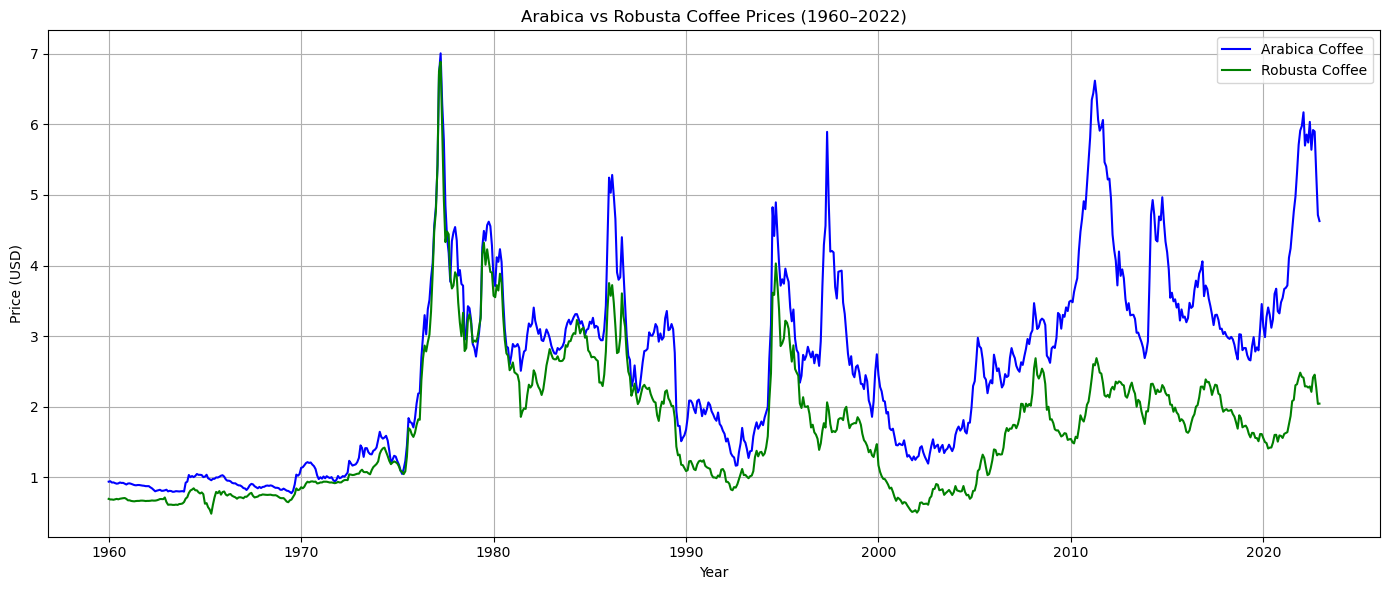

Arabica Price Volatility (std): 1.3425
Robusta Price Volatility (std): 0.9407
➡️ Arabica coffee is more volatile between 1960 and 2022.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv("commodity_prices.csv")
df['date'] = pd.to_datetime(df['date'])
df_filtered = df[(df['date'].dt.year >= 1960) & (df['date'].dt.year <= 2022)]

# Plotting the price trends
plt.figure(figsize=(14, 6))
plt.plot(df_filtered['date'], df_filtered['coffee_arabica'], label='Arabica Coffee', color='blue')
plt.plot(df_filtered['date'], df_filtered['coffee_robustas'], label='Robusta Coffee', color='green')
plt.title('Arabica vs Robusta Coffee Prices (1960–2022)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate volatility (standard deviation)
arabica_std = df_filtered['coffee_arabica'].std()
robusta_std = df_filtered['coffee_robustas'].std()

# Determine which is more volatile
if arabica_std > robusta_std:
    more_volatile = "Arabica"
else:
    more_volatile = "Robusta"

print(f"Arabica Price Volatility (std): {arabica_std:.4f}")
print(f"Robusta Price Volatility (std): {robusta_std:.4f}")
print(f"➡️ {more_volatile} coffee is more volatile between 1960 and 2022.")


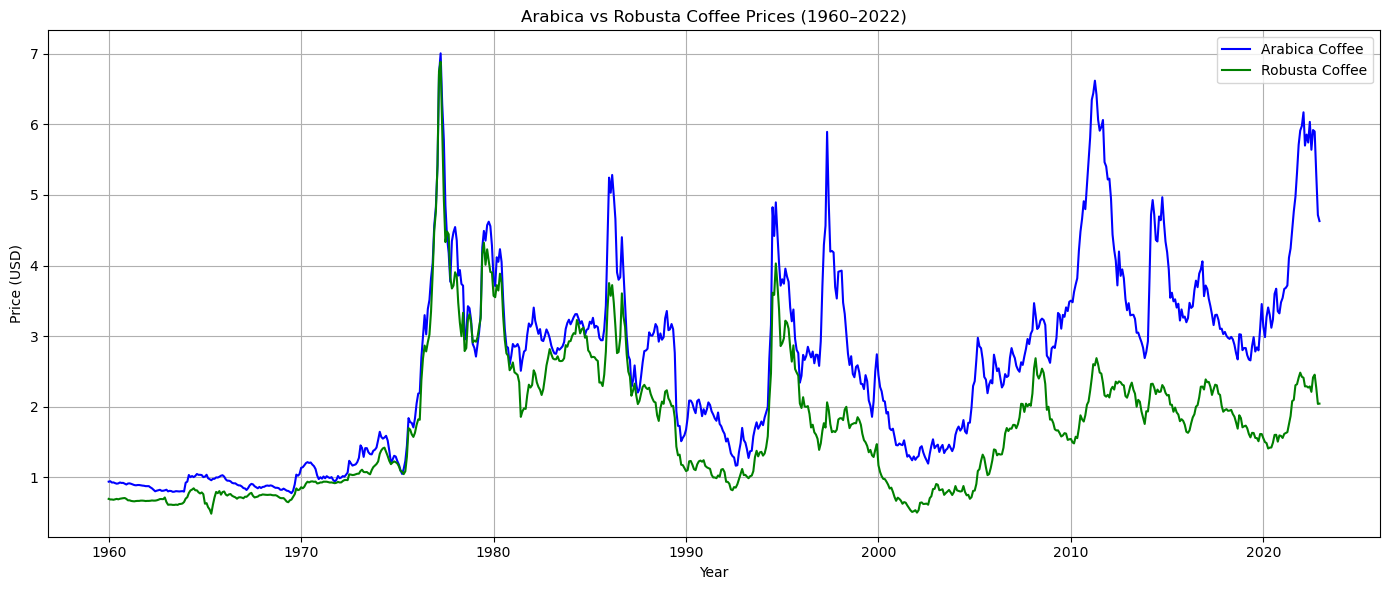

Arabica Price Volatility (std): 1.3425
Robusta Price Volatility (std): 0.9407
➡️ Arabica coffee is more volatile between 1960 and 2022.


In [20]:

# Plotting the price trends
plt.figure(figsize=(14, 6))
plt.plot(data_filtered['date'], data_filtered['coffee_arabica'], label='Arabica Coffee', color='blue')
plt.plot(data_filtered['date'], data_filtered['coffee_robustas'], label='Robusta Coffee', color='green')
plt.title('Arabica vs Robusta Coffee Prices (1960–2022)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

arabica_std = data_filtered['coffee_arabica'].std()
robusta_std = data_filtered['coffee_robustas'].std()

# Determine which is more volatile
if arabica_std > robusta_std:
    more_volatile = "Arabica"
else:
    more_volatile = "Robusta"

print(f"Arabica Price Volatility (std): {arabica_std:.4f}")
print(f"Robusta Price Volatility (std): {robusta_std:.4f}")
print(f"➡️ {more_volatile} coffee is more volatile between 1960 and 2022.")



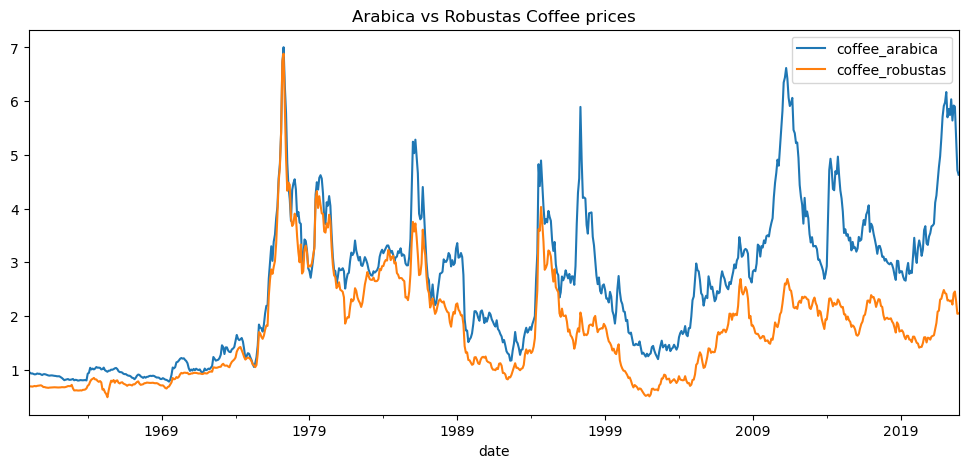

In [21]:
data[['date','coffee_arabica', 'coffee_robustas']].set_index('date').plot(figsize=(12,5))
plt.title('Arabica vs Robustas Coffee prices')
plt.show()

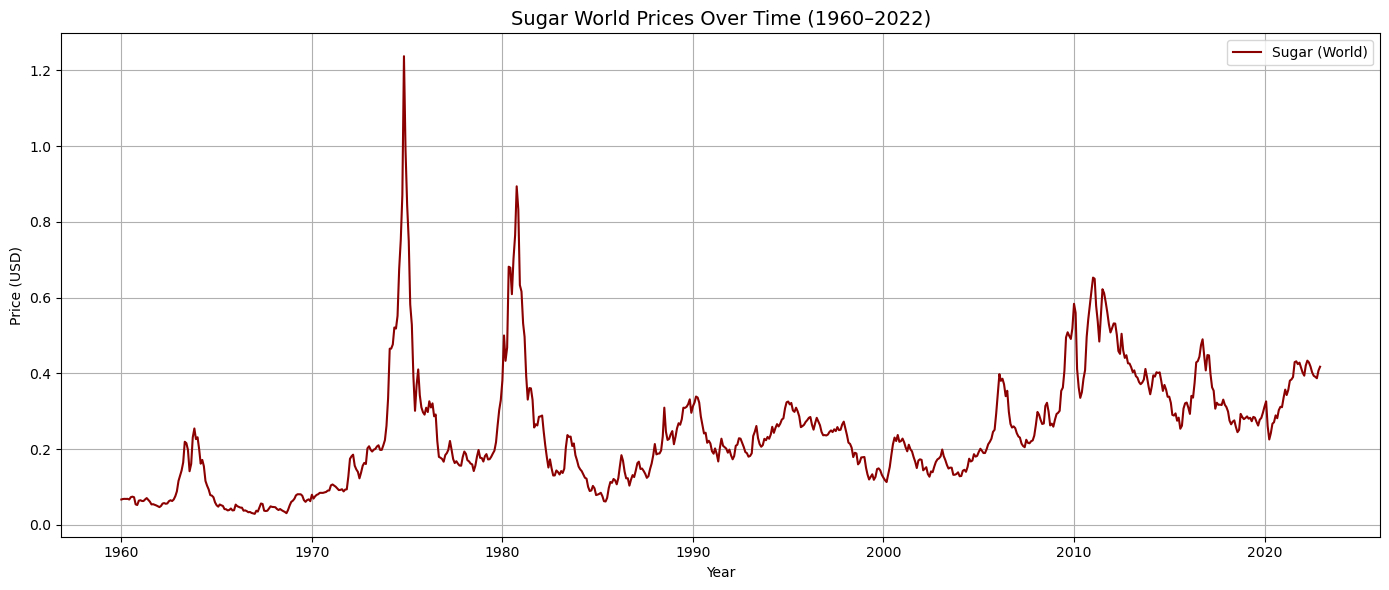

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['sugar_world'], color='darkred', label='Sugar (World)')
plt.title('Sugar World Prices Over Time (1960–2022)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

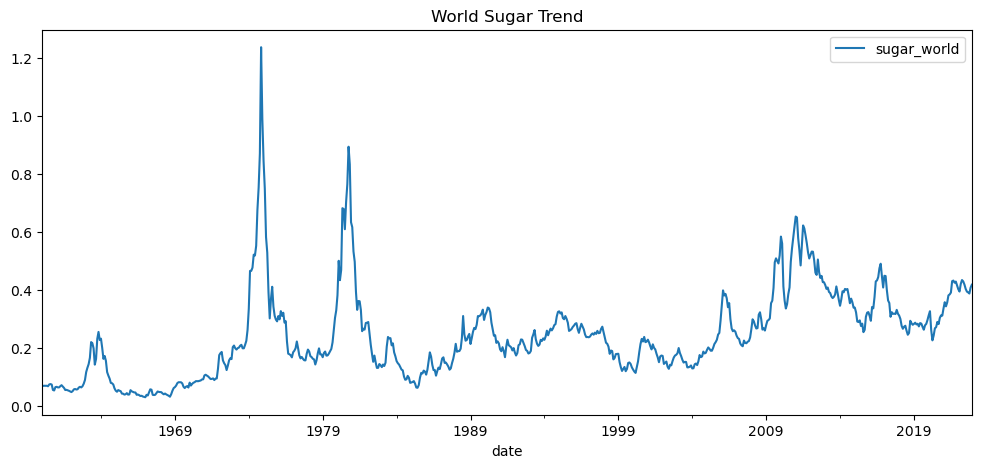

In [23]:
data[['date','sugar_world']].set_index('date').plot(figsize=(12,5))
plt.title('World Sugar Trend')
plt.show()

In [24]:
filtered = data.select_dtypes(include='number')

average_prices = filtered.mean()

high_avg_com = average_prices.idxmax()
high_avg_price = average_prices.max()

print(f"Highest Average Price: {high_avg_com} and Average Price is: ${high_avg_price:} ")


Highest Average Price: oil_brent and Average Price is: $32.724944127733515 


In [ ]:
avg_tea_columbo = data['tea_columbo'].mean()

data['tea_columbo_above_avg'] = np.where(data['tea_columbo'] > avg_tea_columbo,'Above avg', 'Below avg')

print(data[['date', 'tea_columbo', 'tea_columbo_above_avg']])

In [ ]:
data.columns

In [27]:
avg_columbo = data['tea_columbo'].mean()
avg_kolkata = data['tea_kolkata'].mean()
avg_mombasa = data['tea_mombasa'].mean()

data['columbo_above'] = data['tea_columbo'] > avg_columbo
data['kolkata_above'] = data['tea_kolkata'] > avg_kolkata
data['mombasa_above'] = data['tea_mombasa'] > avg_mombasa

x = data[data['columbo_above'] & data['kolkata_above'] & data['mombasa_above']]

long_time_avg = (x['date'].dt.year.unique())

print(sorted(long_time_avg) )


[1977, 1983, 1984, 1990, 1997, 1998, 1999, 2000, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
